In [1]:
!wget https://s3.eu-west-2.amazonaws.com/mogreps-g-sample2/air_pressure_at_sea_level/20160101_00_mogreps-g_air_pressure_at_sea_level.nc

--2017-05-18 15:40:07--  https://s3.eu-west-2.amazonaws.com/mogreps-g-sample2/air_pressure_at_sea_level/20160101_00_mogreps-g_air_pressure_at_sea_level.nc
Resolving s3.eu-west-2.amazonaws.com (s3.eu-west-2.amazonaws.com)... 52.95.149.20
Connecting to s3.eu-west-2.amazonaws.com (s3.eu-west-2.amazonaws.com)|52.95.149.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 412491783 (393M) [application/octet-stream]
Saving to: ‘20160101_00_mogreps-g_air_pressure_at_sea_level.nc’

20160101_00_mogreps 100%[=====================>] 393.38M  67.9MB/s   in 5.8s   

2017-05-18 15:40:12 (68.0 MB/s) - ‘20160101_00_mogreps-g_air_pressure_at_sea_level.nc’ saved [412491783/412491783]



In [6]:
import iris

cube = iris.load_cube('./20160101_00_mogreps-g_air_pressure_at_sea_level.nc')
print(cube)

air_pressure_at_sea_level / (Pa)    (realization: 12; time: 59; latitude: 600; longitude: 800)
     Dimension coordinates:
          realization                           x         -             -               -
          time                                  -         x             -               -
          latitude                              -         -             x               -
          longitude                             -         -             -               x
     Auxiliary coordinates:
          forecast_period                       -         x             -               -
     Scalar coordinates:
          forecast_reference_time: 2016-01-01 00:00:00
     Attributes:
          Conventions: CF-1.5
          STASH: m01s16i222
          source: Data from Met Office Unified Model
          um_version: 10.1


/opt/conda/lib/python3.5/site-packages/iris/fileformats/cf.py:1140: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


In [75]:
print(cube[0][-1].data)

[[  99203.   99204.   99204. ...,   99203.   99203.   99203.]
 [  99274.   99275.   99275. ...,   99274.   99274.   99274.]
 [  99264.   99264.   99265. ...,   99263.   99263.   99263.]
 ..., 
 [ 101534.  101534.  101535. ...,  101532.  101533.  101533.]
 [ 101444.  101445.  101445. ...,  101443.  101444.  101444.]
 [ 101362.  101362.  101362. ...,  101362.  101362.  101362.]]


In [11]:
collapsed_cube = cube.collapsed(['latitude', 'longitude'], iris.analysis.MEAN)
print(collapsed_cube)

/opt/conda/lib/python3.5/site-packages/iris/cube.py:3254: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/opt/conda/lib/python3.5/site-packages/iris/coords.py:992: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


air_pressure_at_sea_level / (Pa)    (realization: 12; time: 59)
     Dimension coordinates:
          realization                           x         -
          time                                  -         x
     Auxiliary coordinates:
          forecast_period                       -         x
     Scalar coordinates:
          forecast_reference_time: 2016-01-01 00:00:00
          latitude: 7.62939e-06 degrees, bound=(-89.85, 89.85) degrees
          longitude: 180.225 degrees, bound=(0.225, 360.225) degrees
     Attributes:
          Conventions: CF-1.5
          STASH: m01s16i222
          source: Data from Met Office Unified Model
          um_version: 10.1
     Cell methods:
          mean: latitude, longitude


In [85]:
collapsed_cube[0][-1].data

array(100808.984375, dtype=float32)

In [72]:
import matplotlib
matplotlib.rc('axes.formatter', useoffset=False)


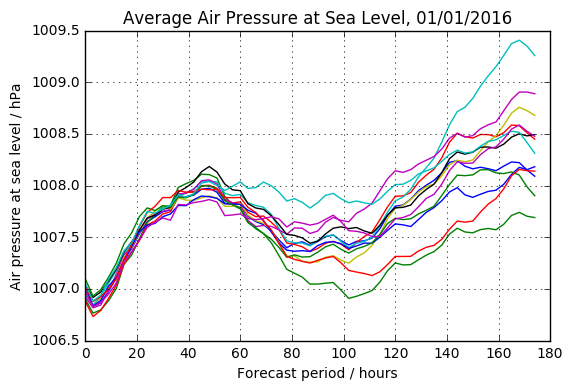

In [105]:
for member_slice in collapsed_cube.slices_over('realization'):
    member_slice.convert_units('hPa')
    label = 'realization: %s' % member_slice.coord('realization').points[0]
    qplt.plot(member_slice.coord('forecast_period'), member_slice,  label=label)


plt.title('Average Air Pressure at Sea Level, 01/01/2016')

plt.grid()
plt.savefig('./graph1.png', )
iplt.show()

In [104]:
plt.savefig('./graph1.png', )

In [80]:
cube.convert_units('hPa')

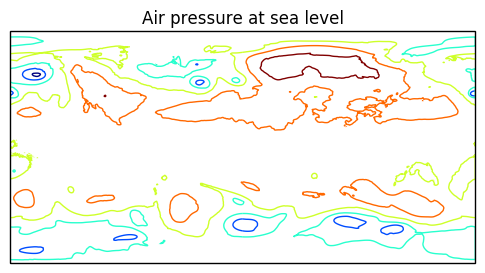

In [102]:
qplt.contour(cube[0][10])
plt.show()